In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.transforms
import seaborn as sns
import math
from math import sqrt, factorial
import re
from itertools import groupby
from operator import itemgetter
import scipy
import random
from decimal import Decimal
#some functions that help find angles between planes

#https://keisan.casio.com/exec/system/1223596129
def plane_eq(points):
    p0 = points[0,:]
    p1 = points[1,:]
    p2 = points[2,:]
    v1 = [p1[0]-p0[0], p1[1]-p0[1], p1[2]-p0[2]]
    v2 = [p2[0]-p0[0], p2[1]-p0[1], p2[2]-p0[2]]
    abc = np.cross(v1, v2)
    d = np.array([abc[0]*p0[0], abc[1]*p0[1], abc[2]*p0[2]])
    return abc, d
# Function to find Angle
def distance(a1, b1, c1, a2, b2, c2):
     
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return A

def angle(a1, b1, a2, b2):
     
    d = ( a1 * a2 + b1 * b2)
    e1 = math.sqrt( a1 * a1 + b1 * b1)
    e2 = math.sqrt( a2 * a2 + b2 * b2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return A
def closest(lst, K):  
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

In [7]:
#get directories and open separated datasets

savedir = 'D:/Aaron/Data/Galvanotaxis_Confocal_40x_30C/Data_and_Figs/'

#get directories
gfl = 'D:/Aaron/Data/Galvanotaxis_Confocal_40x_30C/'
gfolder_fl = gfl + 'Data_and_Figs/'
Slow = pd.read_csv(gfolder_fl + 'Shape_Metrics_transitionPCbins.csv', index_col=0)
ffolder_fl = gfl + 'Data_and_Figs_Fast/'
Fast = pd.read_csv(ffolder_fl + 'Shape_Metrics_transitionPCbins.csv', index_col=0)
#combine
TotalFrame = pd.concat([Slow,Fast])



In [30]:
TotalFrame.Cell_LeftRightAngle.max()

89.51684235318115

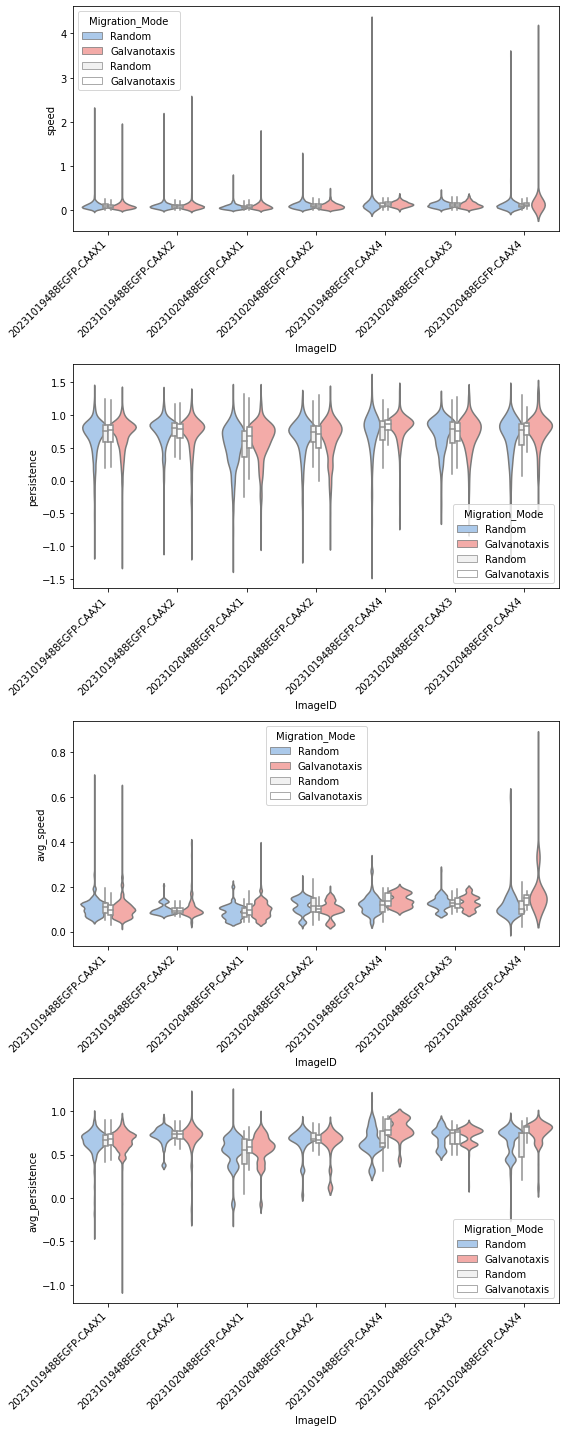

In [26]:
TotalFrame['ImageID'] = [''.join(x.split('_')[:3]) for x in TotalFrame.CellID.to_list()]
colorlist = [list(sns.color_palette('pastel').as_hex())[i] for i in [0,3,8]]
statz = ['speed','persistence','avg_speed','avg_persistence']
fig, axes = plt.subplots(4,1, figsize=(8,20))
for i, s in enumerate(statz):
    sns.violinplot(data=TotalFrame, x = 'ImageID',y = s, hue = 'Migration_Mode',
                   palette = colorlist, inner = None, ax=axes[i])
    sns.boxplot(data=TotalFrame, x = 'ImageID', y=s, hue = 'Migration_Mode', width = 0.15, 
            color = 'white', showcaps=False, fliersize=0, boxprops={'zorder': 2}, 
                ax=axes[i])
    axes[i].set_xticklabels(
        axes[i].get_xticklabels(),
        rotation=45,
        horizontalalignment='right',
#         fontsize = 16
        )
plt.tight_layout()

In [31]:
TotalFrame.columns.to_list()

['cell',
 'Euler_angles_X',
 'Euler_angles_Y',
 'Euler_angles_Z',
 'Width_Rotation_Angle',
 'Cell_Centroid_X',
 'Cell_Centroid_Y',
 'Cell_Centroid_Z',
 'Cell_Volume',
 'Cell_Volume_Front',
 'Cell_SurfaceArea',
 'Cell_MajorAxis',
 'Cell_MinorAxis',
 'Cell_MiniAxis',
 'OriginaltoReconError',
 'RecontoOriginalError',
 'shcoeffs_L0M0C',
 'shcoeffs_L0M1C',
 'shcoeffs_L0M2C',
 'shcoeffs_L0M3C',
 'shcoeffs_L0M4C',
 'shcoeffs_L0M5C',
 'shcoeffs_L0M6C',
 'shcoeffs_L0M7C',
 'shcoeffs_L0M8C',
 'shcoeffs_L0M9C',
 'shcoeffs_L0M10C',
 'shcoeffs_L1M0C',
 'shcoeffs_L1M1C',
 'shcoeffs_L1M2C',
 'shcoeffs_L1M3C',
 'shcoeffs_L1M4C',
 'shcoeffs_L1M5C',
 'shcoeffs_L1M6C',
 'shcoeffs_L1M7C',
 'shcoeffs_L1M8C',
 'shcoeffs_L1M9C',
 'shcoeffs_L1M10C',
 'shcoeffs_L2M0C',
 'shcoeffs_L2M1C',
 'shcoeffs_L2M2C',
 'shcoeffs_L2M3C',
 'shcoeffs_L2M4C',
 'shcoeffs_L2M5C',
 'shcoeffs_L2M6C',
 'shcoeffs_L2M7C',
 'shcoeffs_L2M8C',
 'shcoeffs_L2M9C',
 'shcoeffs_L2M10C',
 'shcoeffs_L3M0C',
 'shcoeffs_L3M1C',
 'shcoeffs_L3M2C

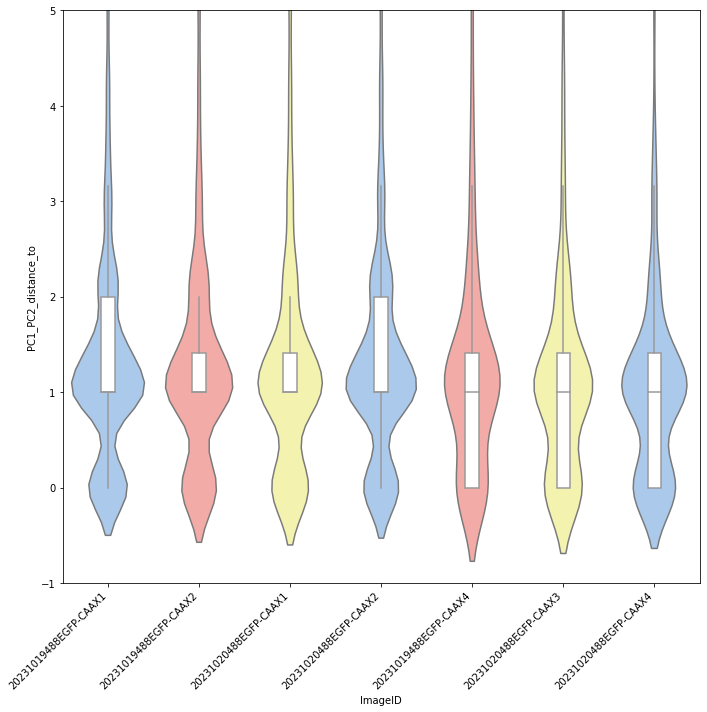

In [38]:
########### amount of shape change between frames ############

fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(data=TotalFrame, x = 'ImageID',y = 'PC1_PC2_distance_to', 
               palette = colorlist, inner = None, ax=ax)
sns.boxplot(data=TotalFrame, x = 'ImageID', y='PC1_PC2_distance_to',  width = 0.15, 
        color = 'white', showcaps=False, fliersize=0, boxprops={'zorder': 2}, 
            ax=ax)
ax.set_xticklabels(
    axes[i].get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
#         fontsize = 16
        )
ax.set_ylim(-1,5)
plt.tight_layout()

In [4]:
############### Get Correlation matrix #######################

#stats to remove, if any
to_remove = [i for i in TotalFrame.columns.to_list() if 'Axis' in i] 
# to_remove.extend([i for i in TotalFrame.columns.to_list() if 'Centroid' in i])
to_remove.extend([i for i in TotalFrame.columns.to_list() if 'bin' in i])
# to_remove.extend([i for i in TotalFrame.columns.to_list() if 'intensity' in i])
to_remove.extend([i for i in TotalFrame.columns.to_list() if 'shcoeff' in i])
to_remove.extend([i for i in TotalFrame.columns.to_list() if 'Trajectory' in i])
# to_remove.extend([i for i in TotalFrame.columns.to_list() if 'dist' in i])


#get pearson correlation matrix for TotalFrame without bins
totalcorr = TotalFrame.drop(columns = to_remove)
totalcorr = totalcorr.corr()


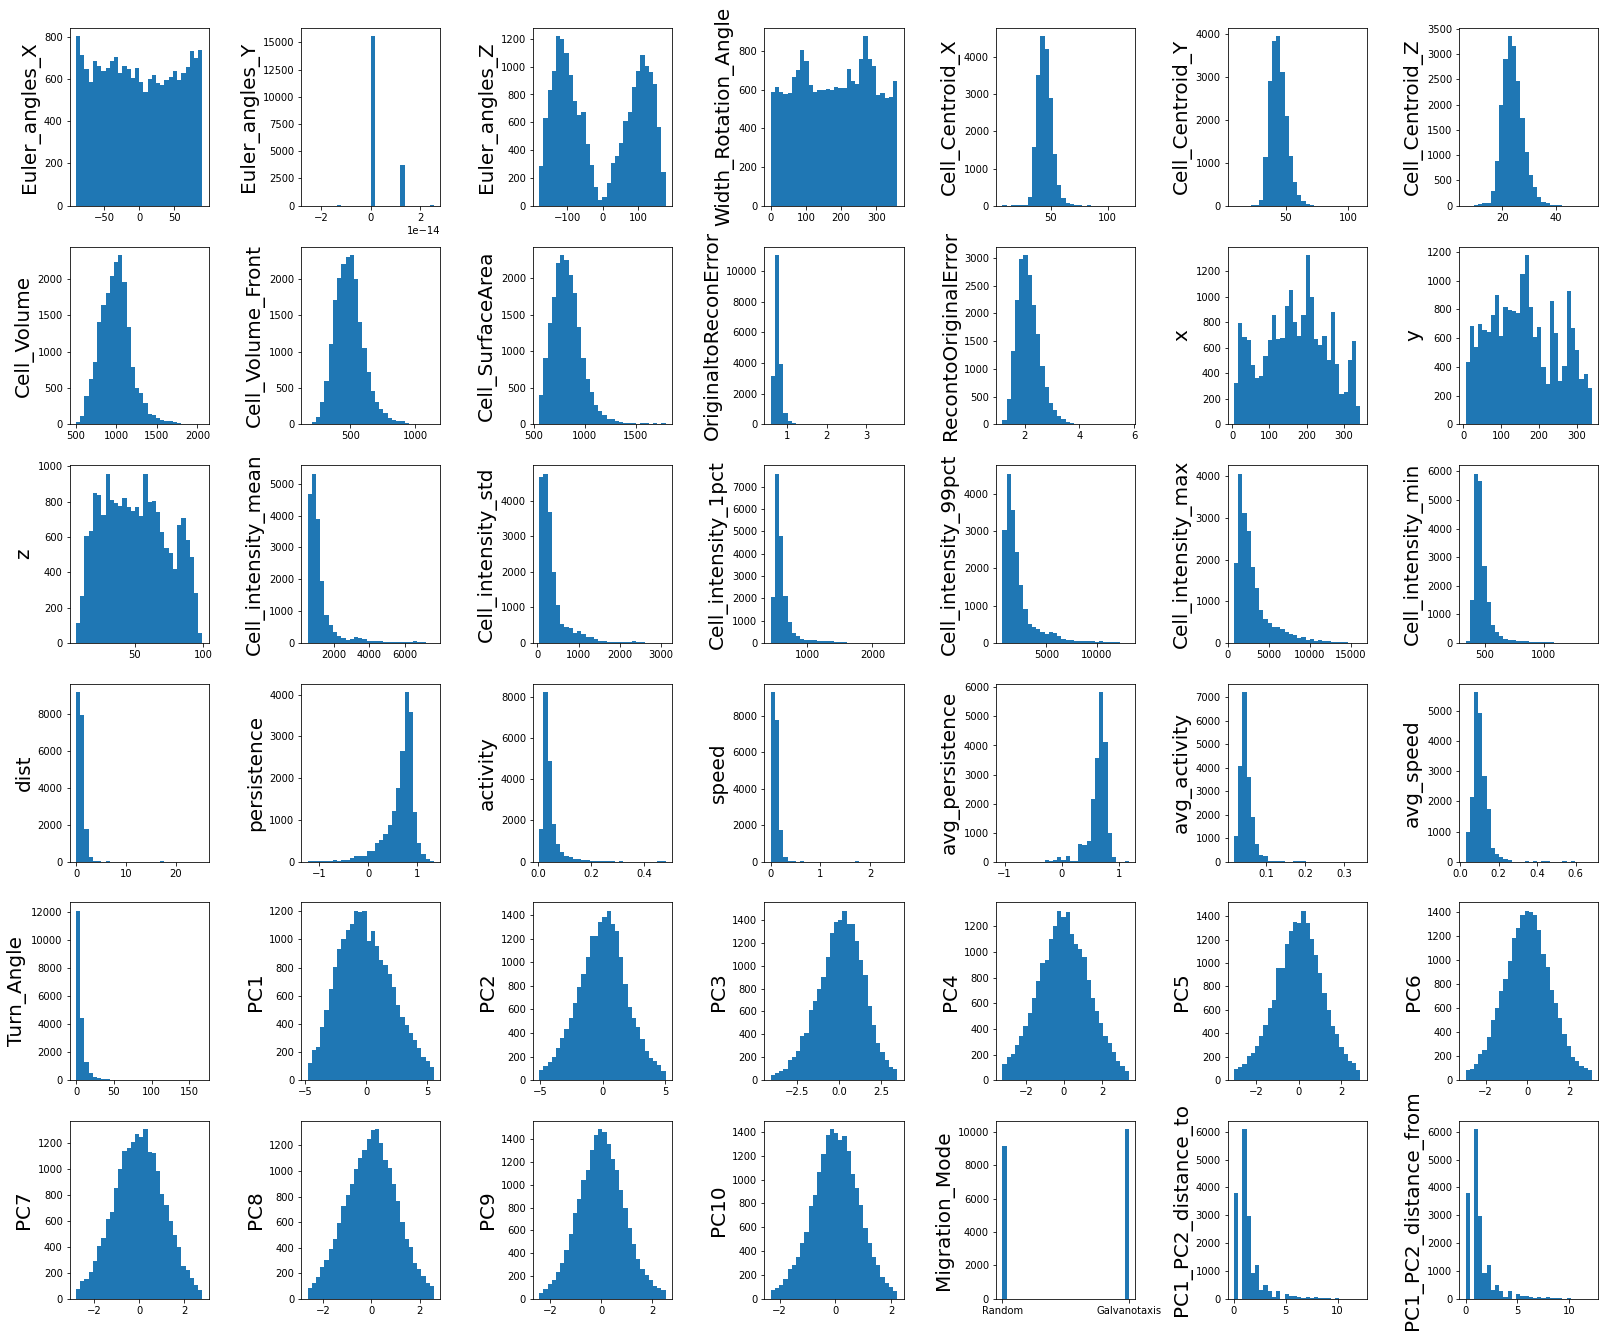

In [4]:
################# LOOK AT STAT DISTRIBUTIONS ######################


# colors = list(sns.color_palette('deep').as_hex())
smallerframe = TotalFrame.drop(columns = to_remove)
smallerframe = smallerframe.drop(columns = ['cell','cell.1','CellID','structure','frame'])
CoRo = math.ceil(math.sqrt(len(smallerframe.columns)))
row = 0
fig, axes = plt.subplots(CoRo, CoRo, figsize=(3.2*CoRo,3*CoRo))#, sharex=True)

for i, met in enumerate(smallerframe.columns.to_list()):
    ax = axes[row,(i-((CoRo-1)*row)-row)]
    ax.hist(smallerframe.iloc[:,i], 30)#, color=colors[i]) , 30, (-2,2))
    ax.set_ylabel(smallerframe.iloc[:,i].name, fontsize = 20)
    if (i+1)%(CoRo) ==0:
        row = row + 1

        
#delete all of the subplots that are unused
for a in range(i+1,CoRo**2):
    fig.delaxes(axes[row,(a-((CoRo-1)*row)-row)])
    if (a+1)%(CoRo) ==0:
        row = row + 1

# #     ax.set_ylabel(Nucleus_Metrics.iloc[:,i].name)

# # axes[0,0].set_title("Cell", fontsize = 16)
# # axes[0,1].set_title("Nucleus", fontsize = 16)
# # [ax.set_xlabel("Component value") for ax in axes[-1,:]];

plt.tight_layout()
# plt.savefig(folder_fl + 'Shape Metric Histograms.png', bbox_inches='tight')

In [101]:
i+1,CoRo**2

(56, 64)

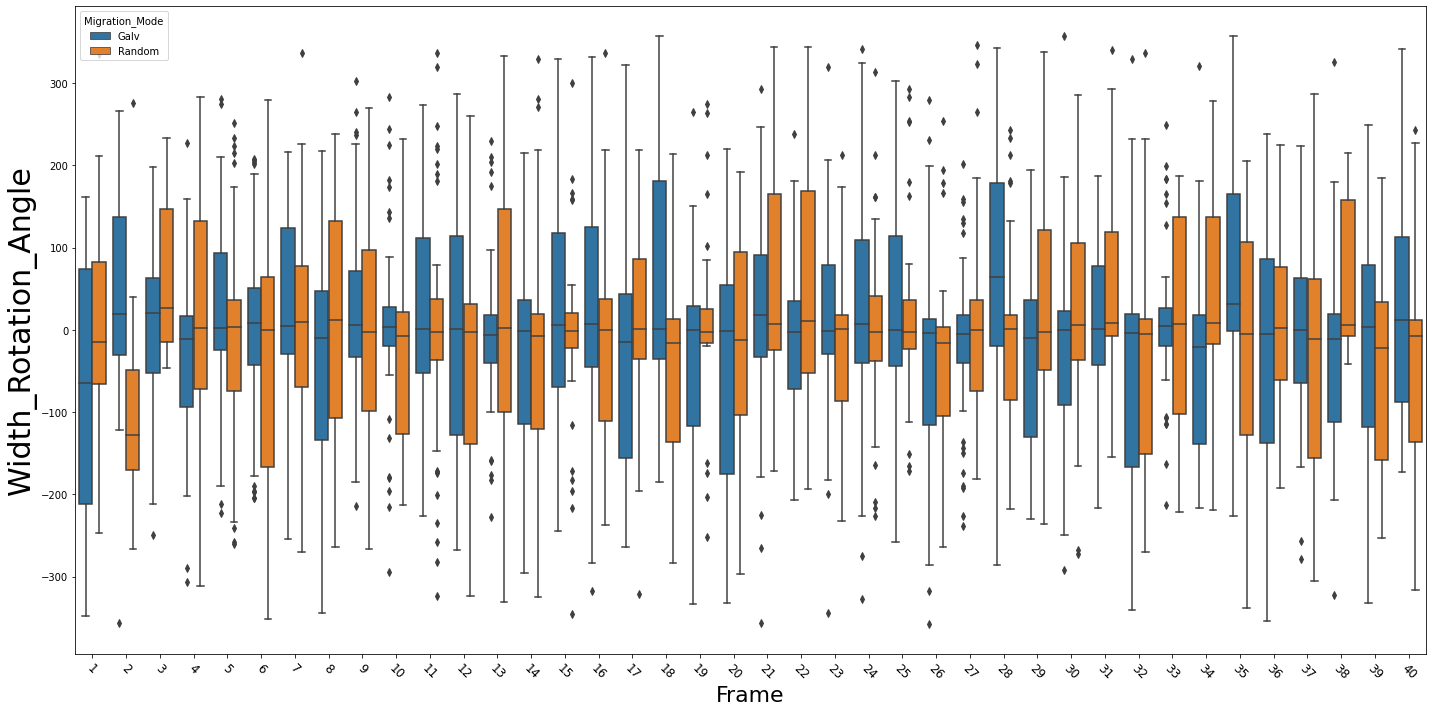

In [7]:
################ how much is rotation of the cell changing from frame to frame ###############

difflist = []
for i, d in TotalFrame[['CellID','Migration_Mode','frame','Width_Rotation_Angle']].sort_values(by='frame').groupby('CellID'):
    dtemp = d[['frame','Width_Rotation_Angle']].diff()
    dtemp = dtemp[dtemp.frame==1]
    dtemp['frame'] = d.frame[dtemp.index]
    dtemp['CellID'] =  [i]*len(dtemp)
    dtemp['Migration_Mode'] = d.Migration_Mode[dtemp.index]
    difflist.append(dtemp)
diffdf = pd.concat(difflist)

fig, ax = plt.subplots(1, 1, figsize=(20,10), sharey=True)

cpc = 'Width_Rotation_Angle'
sns.boxplot(data=diffdf, x='frame', hue='Migration_Mode',y=cpc, ax=ax)
ax.set_xticklabels(
    np.sort(diffdf.frame.unique()).astype(int),
    rotation=-45,
    fontsize = 12
    )
#set axis titles
ax.set_ylabel(cpc, fontsize = 30)
ax.set_xlabel('Frame', fontsize = 22)
plt.tight_layout()
# fig.savefig(savedir+'PC bin differentials.png', facecolor='white')

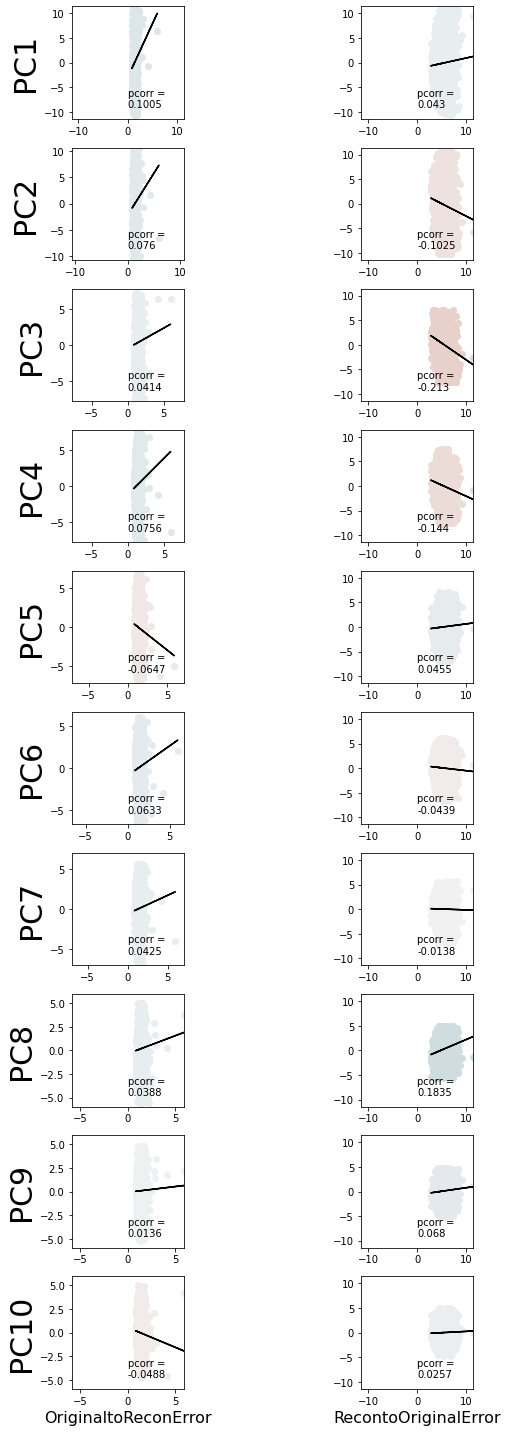

In [22]:

color_scale = pd.DataFrame({'color':list(sns.diverging_palette(20, 220, n=200).as_hex()),
              'value':list(np.arange(-1,1,2/200))})
#Scatter plots for cell metrics and the PCs
metric_frame = TotalFrame.loc[:,[x for x in list(TotalFrame.columns) if 'Error' in x]]
PC_frame = TotalFrame.loc[:,[x for x in list(TotalFrame.columns) if 'PC' in x]]
PC_frame = PC_frame.loc[:,[x for x in list(PC_frame.columns) if 'bin' not in x]]
PC_frame = PC_frame.loc[:,[x for x in list(PC_frame.columns) if 'delta' not in x]]

fig, axes = plt.subplots(len(PC_frame.columns), len(metric_frame.columns), figsize=(10,20))#, sharex=True)
for q in range(axes.shape[0]):
    for i, ax in enumerate(axes[q,:]):
        x = metric_frame.iloc[:,i]
        y = PC_frame[f'PC{q+1}']
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
        p_corr = totalcorr.loc[f'PC{q+1}', metric_frame.iloc[:,i].name]
        color = color_scale.color.loc[color_scale.value == closest(list(color_scale.value), p_corr)].values[0]
        ax.scatter(x,y, color = color)
        ax.plot(x, intercept+slope*x, 'k')
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
        ax.text(0.5, 0.1, 'pcorr =\n'+str(round(p_corr,4)),transform=ax.transAxes)
        ax.set_aspect('equal','box')
        maxlim = max(x.max(),y.max(), abs(x.min()), abs(y.min()))
        ax.set_xlim(-maxlim,maxlim)
        ax.set_ylim(-maxlim,maxlim)
# metric_names = [Shape_Metrics.Cell_Volume.name, 
#                RelativeVectors.Y.name, RelativeVectors.Z.name, 
#                'Y+Z', 
#                RandomRotations.Wide_Variance.name,
#                RelativeAngles.PitchAngle.name,
#                RelativeAngles.RollAngle.name,
#                RelativeAngles.PitchAngleNorm.name,
#               RelativeAngles.RollAngleNorm.name#,
# #                Shape_Metrics.Tilt.name
#                ]

# axes[0,0].set_title("PC 1")
# axes[0,1].set_title("PC 2")
# axes[0,2].set_title("PC 3")
xlabels = [x.replace('_','\n') for x in metric_frame.columns]
[ax.set_ylabel(PC_frame.columns[i], fontsize = 30) for i, ax in enumerate(axes[:,0])];
[ax.set_xlabel(xlabels[i], fontsize = 16) for i, ax in enumerate(axes[-1,:])];

plt.tight_layout()
# plt.savefig(folder_fl+ 'PC vs. Metric scatter matrix.png', bbox_inches='tight')

In [5]:
# get list of metrics that are significant by anova
ModeFrame = TotalFrame.copy()

import scipy.stats as ss
siglist = []
new_remove = to_remove.copy()
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'cell' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'frame' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'angle' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'avg' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'dist' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'activity' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'structure' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'ID' in x])


for c in ModeFrame.drop(columns=new_remove).columns.to_list()[:-1]:
    samples = [g[1].dropna() for g in ModeFrame.groupby('Migration_Mode')[c]]
    f_val, p_val = ss.ttest_ind(*samples)
    print(f'Name: {c}, F value: {f_val}, p value: {p_val}')
    if p_val < 0.05:
        siglist.append(c) 
siglist = sorted(siglist)
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# for c in siglist:
#     print(f'Name {c}', pairwise_tukeyhsd(GeneFrame[c], GeneFrame['Gene']))
siglist
# units= ['(a.u.)','(a.u.)','(µm$^3$)','(a.u.)','(a.u.)','(µm$^2$)','(µm$^3$)',
#         '(a.u.)','(a.u.)']

Name: Width_Rotation_Angle, F value: -0.9210478794118154, p value: 0.3570369199245045
Name: Cell_Centroid_X, F value: 3.539312429651909, p value: 0.0004021121248331162
Name: Cell_Centroid_Y, F value: -14.166410613926262, p value: 2.4927797721373004e-45
Name: Cell_Centroid_Z, F value: -10.127296450796557, p value: 4.799775196362206e-24
Name: Cell_Volume, F value: -12.89737885204406, p value: 6.674192245880125e-38
Name: Cell_Volume_Front, F value: -9.612156780040383, p value: 7.949501626790139e-22
Name: Cell_SurfaceArea, F value: -5.224649086856284, p value: 1.7629556287497691e-07
Name: OriginaltoReconError, F value: 1.7961863167002625, p value: 0.07248049294388031
Name: RecontoOriginalError, F value: 2.8406841627727886, p value: 0.004506389593232909
Name: x, F value: 1.5891003404761845, p value: 0.11205408864089303
Name: y, F value: 2.509906477789011, p value: 0.012084414943190595
Name: z, F value: -6.269677856181024, p value: 3.694567395815204e-10
Name: Cell_intensity_mean, F value: -2

['Cell_Centroid_X',
 'Cell_Centroid_Y',
 'Cell_Centroid_Z',
 'Cell_SurfaceArea',
 'Cell_Volume',
 'Cell_Volume_Front',
 'Cell_intensity_1pct',
 'Cell_intensity_99pct',
 'Cell_intensity_max',
 'Cell_intensity_mean',
 'Cell_intensity_min',
 'Cell_intensity_std',
 'PC1',
 'PC2',
 'PC3',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'RecontoOriginalError',
 'Turn_Angle',
 'speed',
 'y',
 'z']

NameError: name 'folder_fl' is not defined

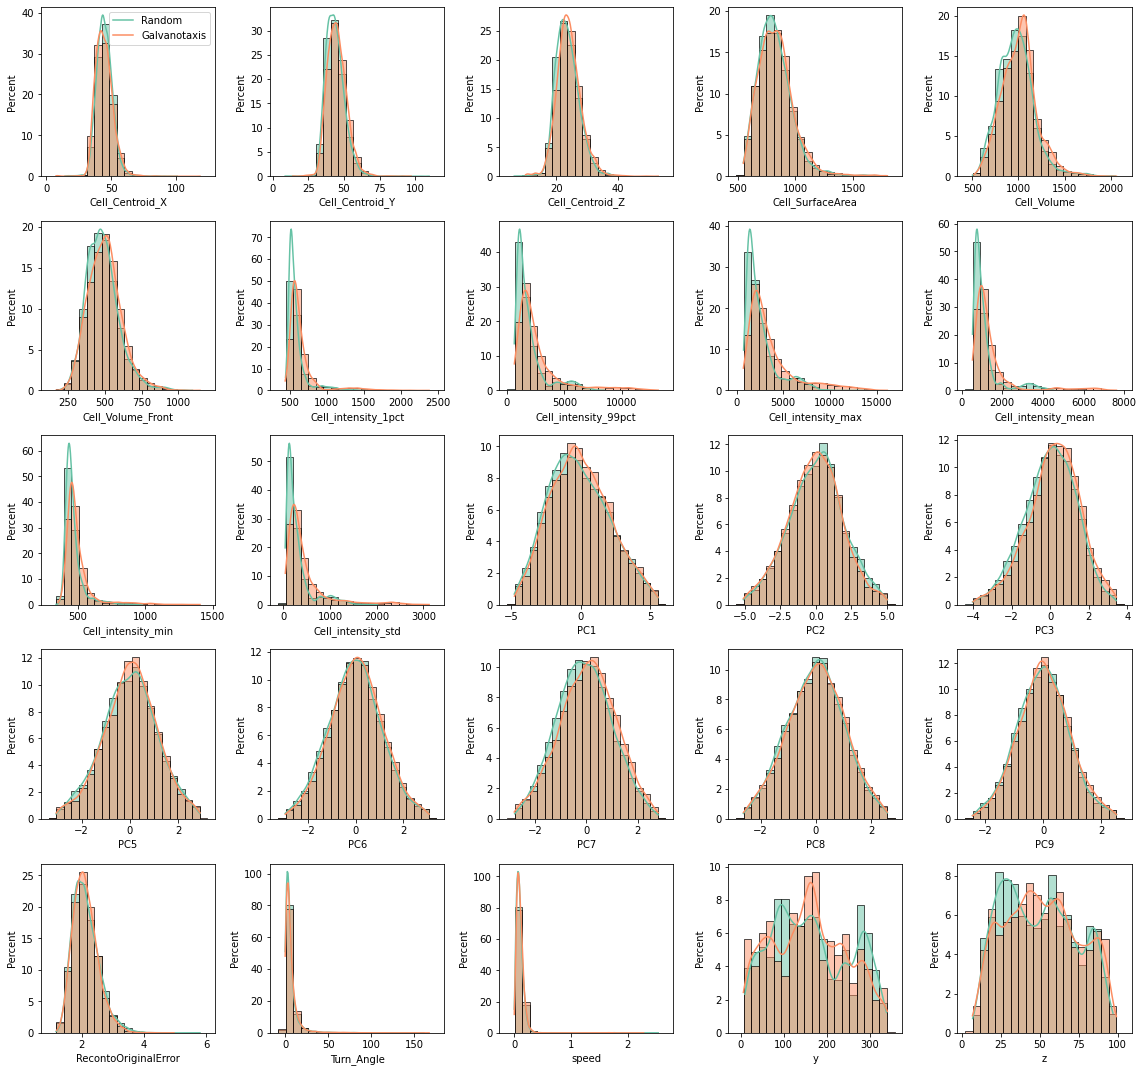

In [6]:
################# LOOK AT STAT DISTRIBUTIONS OF SIGNIFICANT STATS ######################
import seaborn as sns

colors = sns.color_palette("Set2")
colors = list(colors.as_hex())


# colors = list(sns.color_palette('deep').as_hex())
smallerframe = TotalFrame[siglist]
CoRo = math.ceil(math.sqrt(len(smallerframe.columns)))
row = 0
fig, axes = plt.subplots(CoRo, CoRo, figsize=(3.2*CoRo,3*CoRo))#, sharex=True)

for i, met in enumerate(smallerframe.columns.to_list()):

    
    #get the metric in question separated by migration mode
    samples = [g[1].dropna() for g in ModeFrame.groupby('Migration_Mode')[met]]
    
        
    #get bins so that the widths between all types are the same
    maxx = max([max(x) for x in samples])
    minn = min([min(x) for x in samples])
    binwidth = (maxx-minn)*0.05
    maxx = maxx + binwidth
    minn = minn - binwidth
    binss = np.linspace(minn,maxx,round((maxx-minn)/binwidth))
    
    #plot the data
    ax = axes[row,(i-((CoRo-1)*row)-row)]
    sns.histplot(ax = ax, data=samples[0], bins=binss, stat='percent', color = colors[0], kde = True)
    sns.histplot(ax = ax, data=samples[1], bins=binss, stat='percent', color = colors[1], kde = True)
#     ax.set_ylabel(met)#, fontsize = 1.75*CoRo)
    if (i+1)%(CoRo) ==0:
        row = row + 1


ax = axes[0,0]
ax.legend(ModeFrame.Migration_Mode.unique())

#delete all of the subplots that are unused
for a in range(i+1,CoRo**2):
    fig.delaxes(axes[row,(a-((CoRo-1)*row)-row)])
    if (a+1)%(CoRo) ==0:
        row = row + 1

# #     ax.set_ylabel(Nucleus_Metrics.iloc[:,i].name)

# # axes[0,0].set_title("Cell", fontsize = 16)
# # axes[0,1].set_title("Nucleus", fontsize = 16)
# # [ax.set_xlabel("Component value") for ax in axes[-1,:]];
# plt.legend(ModeFrame.Migration_Mode.unique(), loc ='lower right')
plt.tight_layout()
plt.savefig(folder_fl + 'Significant Shape Metric Histograms.png', bbox_inches='tight')

C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


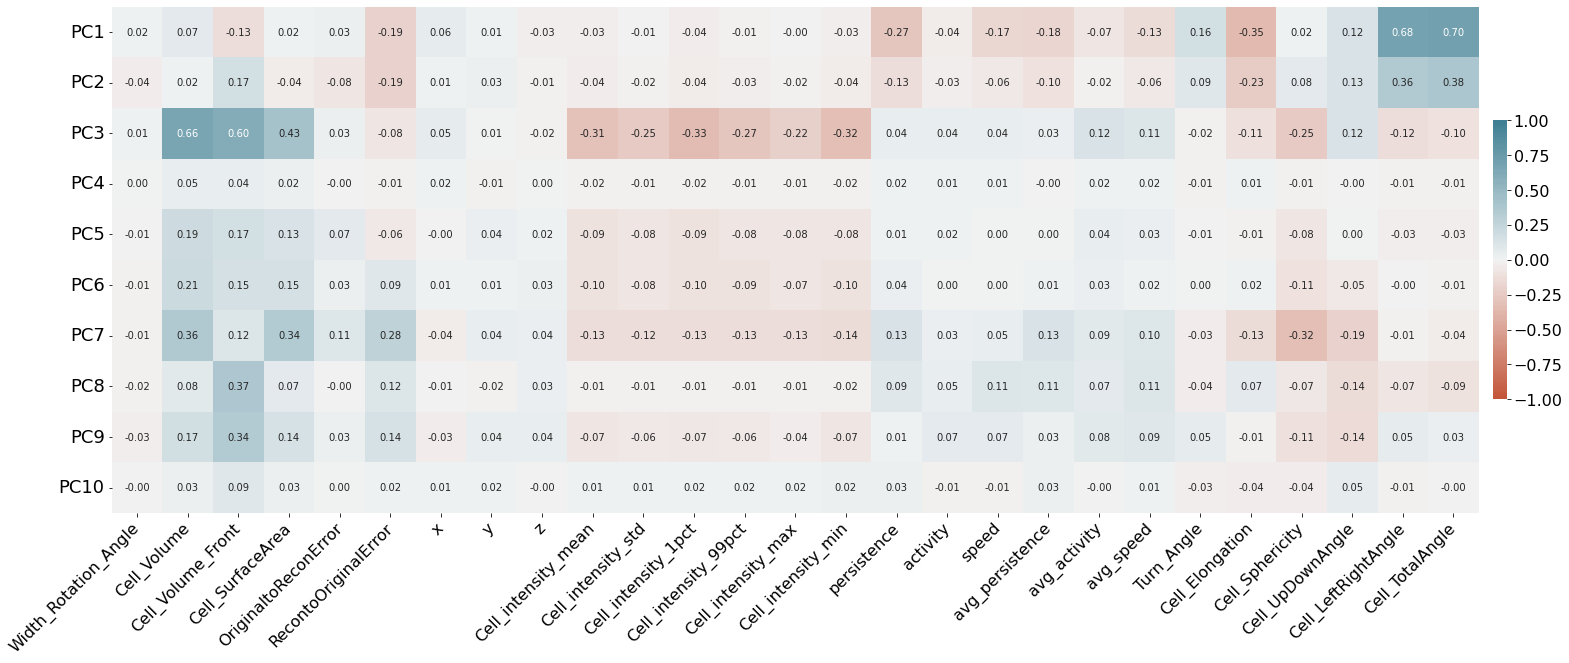

In [6]:
#correlations of shapes with PCs (PCs as rows)

coldrop = []
coldrop.extend([x for x in totalcorr.columns.to_list() if 'delta' in x])
coldrop.extend([x for x in totalcorr.columns.to_list() if 'PC' in x])
coldrop.extend([x for x in TotalFrame.columns.to_list() if 'Euler' in x])
coldrop.extend([x for x in TotalFrame.columns.to_list() if 'Centroid' in x])
coldrop.extend(['frame','dist'])

PCsAndMetrics = totalcorr.loc[[x for x in totalcorr.index if 'PC' in x and 'delta' not in x and 'dist' not in x]]
PCsAndMetrics = PCsAndMetrics.drop(columns = coldrop)
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(
    PCsAndMetrics, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    xticklabels = True,
    yticklabels = True,
    annot = True,
    fmt = '.2f',
    cbar_kws={'fraction':0.01, 'pad':0.01}#, 'shrink': 0.5}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize = 16
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    va = 'center',
    fontsize = 18
)
#scooch the x axis labels by a certain amount
dx = 6/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
cbar = ax.collections[0].colorbar
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=16)

plt.savefig(savedir + 'PC correlation with shape metrics heatmap.png', bbox_inches='tight')

C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator


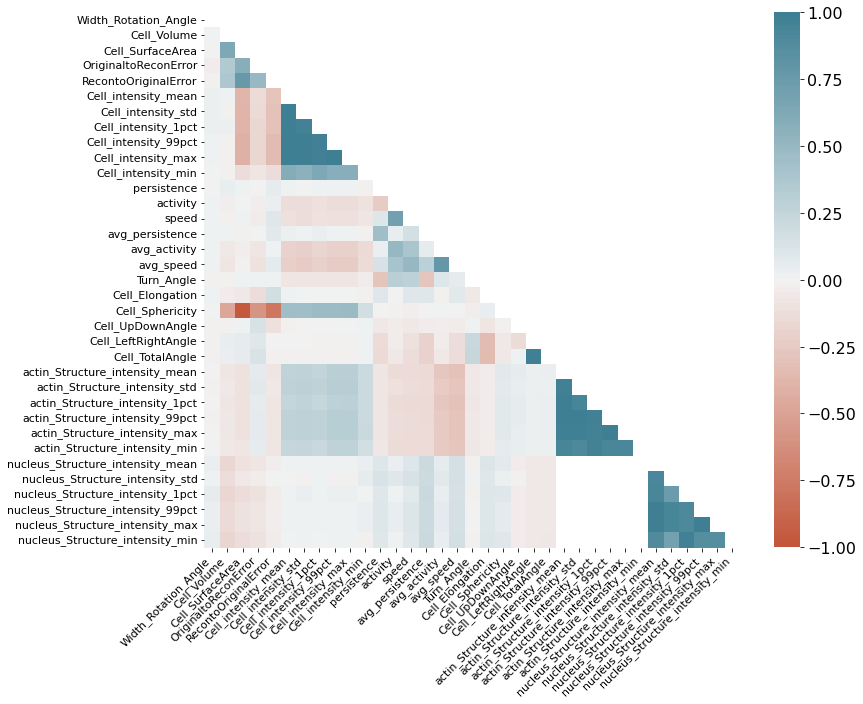

In [22]:
#get columns with nucleus and rows with cells from correlation matrix
coldrop = []
coldrop.extend([x for x in TotalFrame.columns.to_list() if 'Euler' in x])
coldrop.extend([x for x in TotalFrame.columns.to_list() if 'Centroid' in x])
coldrop.extend(['frame','dist'])

PartFramecorr = TotalFrame.drop(columns = to_remove)
PartFramecorr = PartFramecorr.drop(columns = coldrop)
PartFramecorr = PartFramecorr.drop(columns = ([i for i in PartFramecorr.columns.to_list() if 'PC' in i]))
PartFramecorr = PartFramecorr.drop(columns = ([x for x in PartFramecorr.columns.to_list() if 'delta' in x]))
PartFramecorr = PartFramecorr.corr()

#comparison of CELL features
mask = np.zeros_like(PartFramecorr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(
    PartFramecorr,
    mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    xticklabels = True,
    yticklabels = True,
    cbar_kws={'shrink': 0.82}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize = 11
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize = 11
)
cbar = ax.collections[0].colorbar
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=16)
figsize = (5, 30)
plt.savefig(folder_fl + ' Shape Metric corr.png', bbox_inches='tight')

C:\Users\Aaron\anaconda3\envs\shape\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(1, -1.0, '−1.00'),
 Text(1, -0.75, '−0.75'),
 Text(1, -0.5, '−0.50'),
 Text(1, -0.25, '−0.25'),
 Text(1, 0.0, '0.00'),
 Text(1, 0.25, '0.25'),
 Text(1, 0.5, '0.50'),
 Text(1, 0.75, '0.75'),
 Text(1, 1.0, '1.00')]

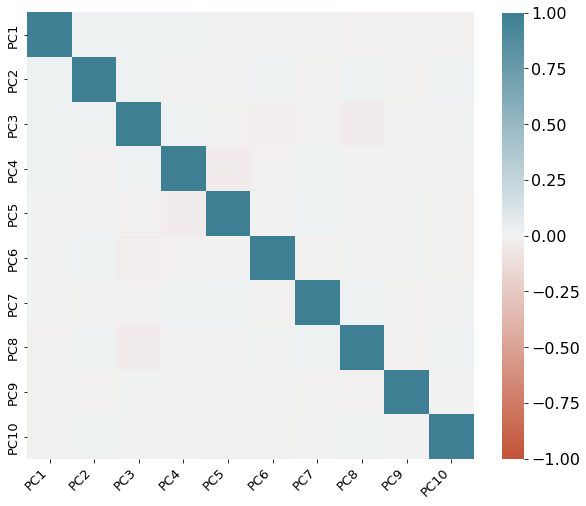

In [29]:
########################## PC Correlations #################

PCcorr = totalcorr.loc[[x for x in list(totalcorr.columns) if 'PC' in x]].loc[:,[x for x in list(totalcorr.columns) if 'PC' in x]]



#comparison of CELL features
fig, ax = plt.subplots(figsize=(len(PCcorr),len(PCcorr)))
ax = sns.heatmap(
    PCcorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    xticklabels = True,
    yticklabels = True,
    cbar_kws={'shrink': 0.82}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize = 13
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize = 13
)
cbar = ax.collections[0].colorbar
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=16)

# plt.savefig(folder_fl + 'Cell+Nuc Shape Metric corr rotationally aligned.png', bbox_inches='tight')

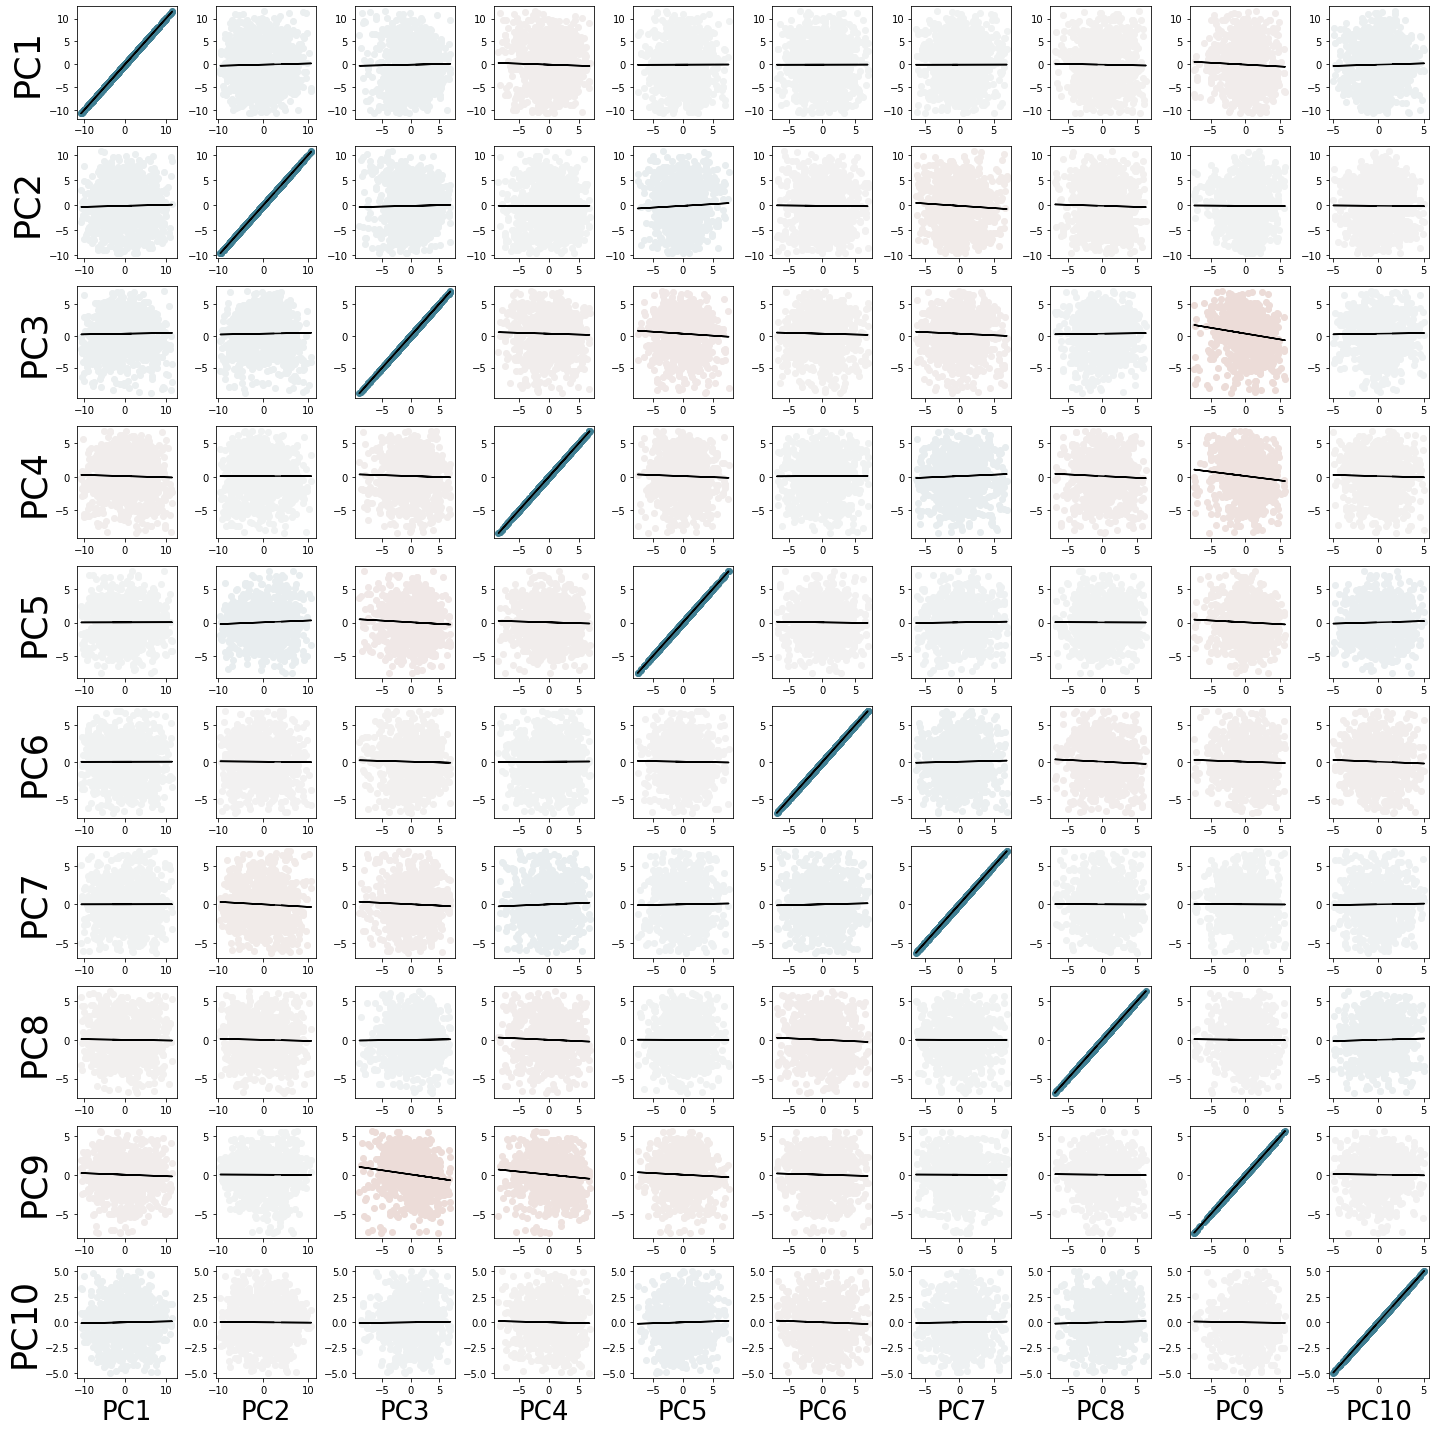

In [15]:
##################### look at scatter correlations between all PCs ###################

def closest(lst, K):  
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
color_scale = pd.DataFrame({'color':list(sns.diverging_palette(20, 220, n=200).as_hex()),
              'value':list(np.arange(-1,1,2/200))})
#Scatter plots for cell metrics and the PCs
PC_frame = TotalFrame.loc[:,[x for x in list(TotalFrame.columns) if 'PC' in x]]
PC_frame = PC_frame.loc[:,[x for x in list(PC_frame.columns) if 'bin' not in x]]

fig, axes = plt.subplots(len(PC_frame.columns), len(PC_frame.columns), figsize=(20,20))#, sharex=True)
for q in range(axes.shape[0]):
    for i, ax in enumerate(axes[q,:]):
        x = PC_frame[f'PC{i+1}']
        y = PC_frame[f'PC{q+1}']
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef) 
        p_corr = totalcorr.loc[f'PC{q+1}', f'PC{i+1}']
        color = color_scale.color.loc[color_scale.value == closest(list(color_scale.value), p_corr)].values[0]
        ax.scatter(x,y, color = color)
        ax.plot(x, poly1d_fn(x), 'k')




# metric_names = [Shape_Metrics.Cell_Volume.name, 
#                RelativeVectors.Y.name, RelativeVectors.Z.name, 
#                'Y+Z', 
#                RandomRotations.Wide_Variance.name,
#                RelativeAngles.PitchAngle.name,
#                RelativeAngles.RollAngle.name,
#                RelativeAngles.PitchAngleNorm.name,
#               RelativeAngles.RollAngleNorm.name#,
# #                Shape_Metrics.Tilt.name
#                ]

# axes[0,0].set_title("PC 1")
# axes[0,1].set_title("PC 2")
# axes[0,2].set_title("PC 3")
xlabels = PC_frame.columns
[ax.set_ylabel(PC_frame.columns[i], fontsize = 35) for i, ax in enumerate(axes[:,0])];
[ax.set_xlabel(xlabels[i], fontsize = 26) for i, ax in enumerate(axes[-1,:])];

plt.tight_layout()
# plt.savefig(folder_fl+ 'PC vs. Metric scatter matrix.png', bbox_inches='tight')

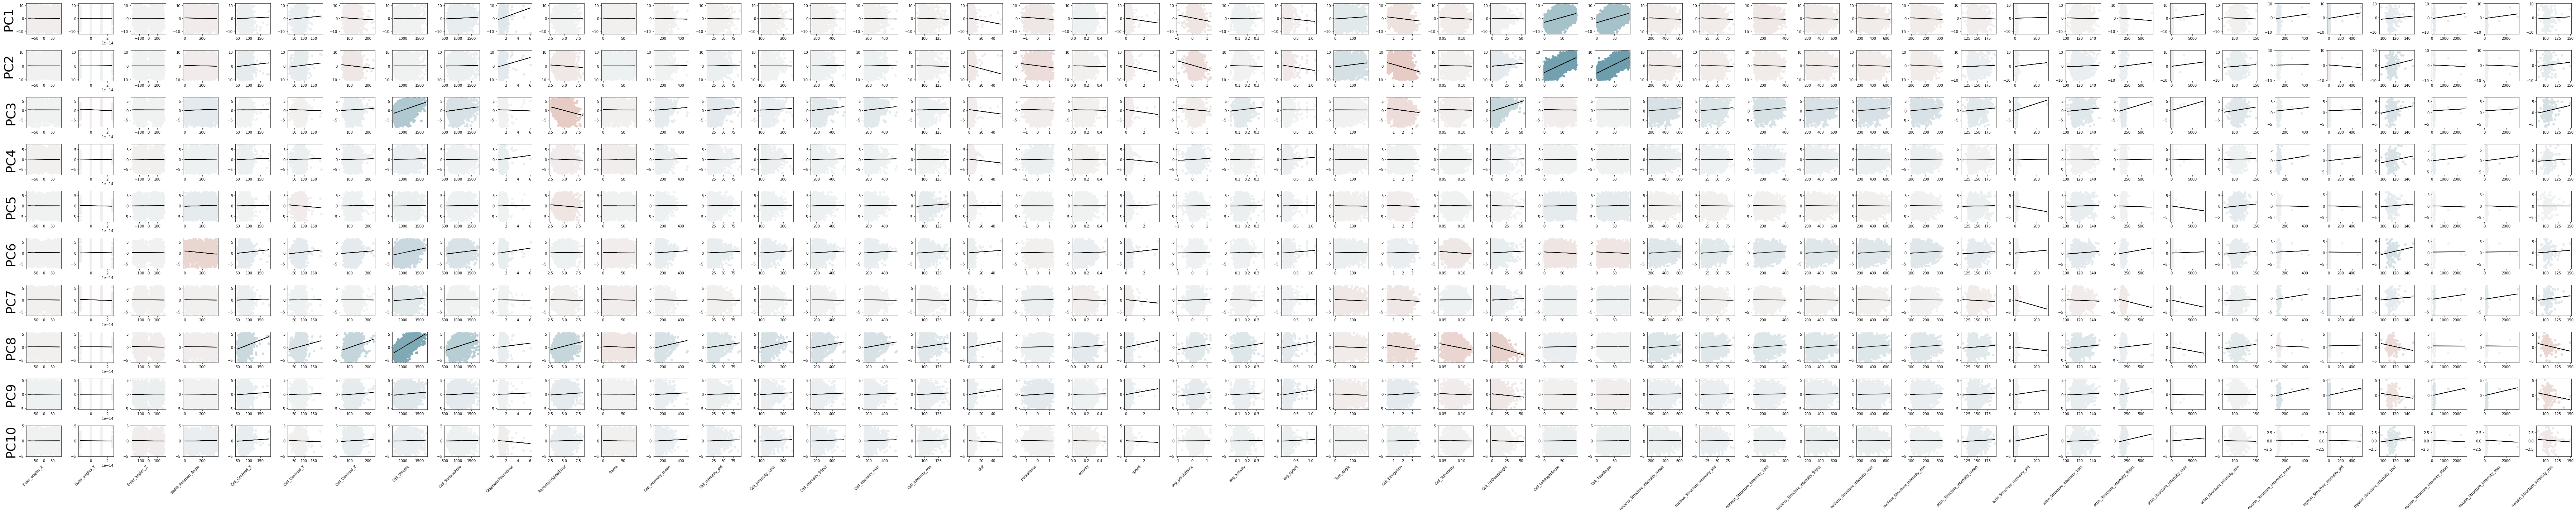

In [8]:
def closest(lst, K):  
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
color_scale = pd.DataFrame({'color':list(sns.diverging_palette(20, 220, n=200).as_hex()),
              'value':list(np.arange(-1,1,2/200))})
#Scatter plots for cell metrics and the PCs
#stats to remove, if any
coldrop = [i for i in TotalFrame.columns.to_list() if 'PC' in i] 
coldrop.extend([i for i in TotalFrame.columns.to_list() if 'bin' in i])
coldrop.extend([i for i in TotalFrame.columns.to_list() if 'cell' in i])
coldrop.extend([i for i in TotalFrame.columns.to_list() if 'CellID' in i])
coldrop.extend([i for i in TotalFrame.columns.to_list() if 'structure' in i])
coldrop.extend([i for i in TotalFrame.columns.to_list() if 'Migration' in i])
coldrop.extend(to_remove)
# metric_frame = metric_frame.drop(columns=list(set(metric_frame.columns.to_list()).intersection(to_remove)))
metric_frame = TotalFrame.drop(columns=coldrop)

PC_frame = TotalFrame.loc[:,[x for x in list(TotalFrame.columns) if 'PC' in x]]
PC_frame = PC_frame.loc[:,[x for x in list(PC_frame.columns) if 'bin' not in x]]
PC_frame = PC_frame.loc[:,[x for x in list(PC_frame.columns) if 'delta' not in x]]

cols = metric_frame.columns.to_list()
fig, axes = plt.subplots(len(PC_frame.columns), len(metric_frame.columns), figsize=(100,20))#, sharex=True)
for q in range(axes.shape[0]):
    for i, ax in enumerate(axes[q,:]):
        rows = metric_frame.iloc[:,i][metric_frame.iloc[:,i].isna() == False].index.to_list()
        x = metric_frame.loc[rows,cols[i]]
        y = PC_frame.loc[rows,f'PC{q+1}']
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef) 
        p_corr = totalcorr.loc[f'PC{q+1}', metric_frame.iloc[:,i].name]
        color = color_scale.color.loc[color_scale.value == closest(list(color_scale.value), p_corr)].values[0]
        ax.scatter(x,y, color = color)
        ax.plot(x, poly1d_fn(x), 'k')
#         ax.text(0.1,0.1,str(np.around(p_corr, decimals=2)))



# metric_names = [Shape_Metrics.Cell_Volume.name, 
#                RelativeVectors.Y.name, RelativeVectors.Z.name, 
#                'Y+Z', 
#                RandomRotations.Wide_Variance.name,
#                RelativeAngles.PitchAngle.name,
#                RelativeAngles.RollAngle.name,
#                RelativeAngles.PitchAngleNorm.name,
#               RelativeAngles.RollAngleNorm.name#,
# #                Shape_Metrics.Tilt.name
#                ]

# axes[0,0].set_title("PC 1")
# axes[0,1].set_title("PC 2")
# axes[0,2].set_title("PC 3")
# xlabels = [x.replace('_','\n') for x in metric_frame.columns]
[ax.set_ylabel(PC_frame.columns[i], fontsize = 35) for i, ax in enumerate(axes[:,0])];
[ax.set_xlabel(metric_frame.columns[i], rotation=45, horizontalalignment='right', fontsize = 10) for i, ax in enumerate(axes[-1,:])];

plt.tight_layout()
plt.savefig(folder_fl+ 'PC vs. Metric scatter matrix.png', bbox_inches='tight')

In [359]:
# coldrop = [i for i in TotalFrame.columns.to_list() if 'PC' in i] 
# coldrop.extend([i for i in TotalFrame.columns.to_list() if 'bin' in i])
# coldrop.extend([i for i in TotalFrame.columns.to_list() if 'cell' in i])
# coldrop.extend([i for i in TotalFrame.columns.to_list() if 'CellID' in i])
# coldrop.extend([i for i in TotalFrame.columns.to_list() if 'delta' in i])
# coldrop, list(set(coldrop).intersection(to_remove))
# metric_frame = metric_frame.drop(columns=list(set(metric_frame.columns.to_list()).intersection(to_remove)))
# metric_frame.columns.to_list()
str(np.around(p_corr, decimals=2))

'-0.0'

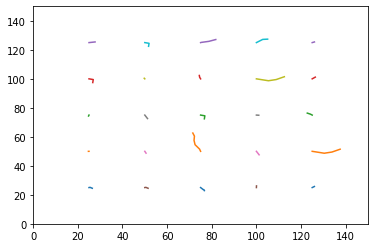

In [94]:
####### plot some example cell trajectories ############
#pick the square root of how many trajectories you want

howmany = 5
# avg_euc = []
# for i, cell in TotalFrame.sort_values('frame').reset_index(drop=True).groupby('CellID'):
#     pos = cell[['x','y','z']].to_numpy()
#     avg_euc.append(scipy.spatial.distance.pdist(np.array([pos[0], pos[-1]])))
# np.mean(avg_euc)
podi = 25
fig, ax = plt.subplots()
#make the plot square and big enough
lim = podi * (howmany+1)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
#list of possible cells that have a given length of frames
numframe = 20
cells = []
for i, cell in TotalFrame.groupby('CellID'):
    if len(cell)>=numframe:
        cells.append(i)
# cells = TotalFrame.CellID.unique()
for x in range(howmany):
    for y in range(howmany):
        random.shuffle(cells)
        current = TotalFrame[TotalFrame.CellID == cells[0]]
        runs = list()
        #######https://stackoverflow.com/questions/2361945/detecting-consecutive-integers-in-a-list
        for k, g in groupby(enumerate(current['frame']), lambda ix: ix[0] - ix[1]):
            currentrun = list(map(itemgetter(1), g))
            list.append(runs, currentrun)
        actualrun = max(runs, key=len, default=[])
        toplot = current[current.frame.isin(actualrun)]
        ax.plot(toplot.x.to_list()-toplot.x.values[0]+((x+1)*podi),toplot.y.to_list()-toplot.y.values[0]+((y+1)*podi))

#     #potentially select longest run
#     runs = list()
#     #######https://stackoverflow.com/questions/2361945/detecting-consecutive-integers-in-a-list
#     for k, g in groupby(enumerate(cells['frame']), lambda ix: ix[0] - ix[1]):
#         currentrun = list(map(itemgetter(1), g))
#         list.append(runs, currentrun)
#     actualrun = max(runs, key=len, default=[])

# np.array([cell.iloc[0][['x','y','z']], cell.iloc[len(cell)-1][['x','y','z']]])